# Analyse de Données Nutritionnelles

In [1]:
# coding: utf-8
%matplotlib inline
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sbn
import matplotlib.pyplot as plt
import pandas as pd
# read the csv file
df = pd.read_csv("foodfacts.csv", sep='\t',low_memory=False)

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)







(320772, 162)
Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)


In [2]:
###Remove Columns with insufficient data (more than 50% of products don't have the value) and columns that won't be retained for the analysis for the analysis
###remove all rows where the nutritional data is insufficient (NaN for all the necessary info) in the curated dataframe

In [21]:
df_edited=df.copy()


#remove incoherent data from these columns (values have to be positive and inferior to 100)
for column in ['fat_100g', 'saturated-fat_100g','carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g','salt_100g', 'sodium_100g']:
    df_edited.loc[df_edited[column]<0, column]=None
    df_edited.loc[df_edited[column]>100, column]=None


for column in df.drop(['categories_fr','categories'], axis=1).columns.values.tolist():
    
    total_rows=df_edited.shape[0]
    nonempty_rows=df_edited[[column]].count().sum()
    if (nonempty_rows/total_rows)<=0.5:
        del df_edited[column]

print(df_edited.columns)

for col in ['url', 'creator', 'created_t', 'created_datetime','last_modified_t', 'last_modified_datetime', 'brands','brands_tags', 'countries', 'countries_tags', 'countries_fr','ingredients_text', 'serving_size', 'additives_n', 'additives','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','states', 'states_tags', 'states_fr','nutrition-score-uk_100g']:
    del df_edited[col]

df_edited=df_edited.dropna(thresh=3)





    

        




Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'categories', 'categories_fr', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'serving_size',
       'additives_n', 'additives', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')


In [22]:
print(df_edited.describe())
print(df_edited.isnull().any())
print(df_edited.columns)
print(df_edited.head())

        energy_100g       fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  2.611030e+05  243887.000000       229551.000000       243569.000000   
mean   1.141879e+03      12.725256            5.125925           32.055323   
std    6.447260e+03      17.503695            7.913684           29.140680   
min    0.000000e+00       0.000000            0.000000            0.000000   
25%    3.770000e+02       0.000000            0.000000            6.000000   
50%    1.100000e+03       5.000000            1.790000           20.600000   
75%    1.674000e+03      20.000000            7.140000           58.330000   
max    3.251373e+06     100.000000          100.000000          100.000000   

         sugars_100g     fiber_100g  proteins_100g      salt_100g  \
count  244951.000000  200881.000000  259918.000000  255351.000000   
mean       15.985514       2.832473       7.079409       1.588503   
std        21.165381       4.588272       8.156552       6.242543   
min         0.000000 

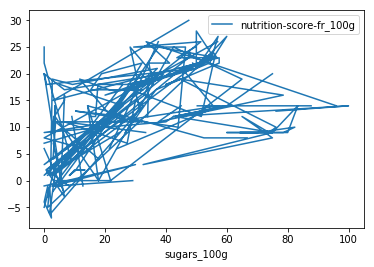

In [27]:
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
sample=df_edited.head(500)
sample.plot(x='sugars_100g',y='nutrition-score-fr_100g')
